In [76]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt

In [77]:
class RowVectorFloat:
    def __init__(self, elements):
        self.elements = list(elements)

    def __str__(self):
        return ' '.join(map(str, self.elements))

    def __len__(self):
        return len(self.elements)

    def __getitem__(self, index):
        return self.elements[index]

    def __setitem__(self, index, value):
        self.elements[index] = value

    def __add__(self, other):
        if len(self) != len(other):
            raise Exception("Vector dimensions must match for addition")
        result_elements = [x + y for x, y in zip(self.elements, other.elements)]
        return RowVectorFloat(result_elements)

    def __sub__(self, other):
        if len(self) != len(other):
            raise Exception("Vector dimensions must match for subtraction")
        result_elements = [x - y for x, y in zip(self.elements, other.elements)]
        return RowVectorFloat(result_elements)

    def __mul__(self, scalar):
        result_elements = [x * scalar for x in self.elements]
        return RowVectorFloat(result_elements)

    def __rmul__(self, scalar):
        return self.__mul__(scalar)

In [78]:
class SquareMatrixFloat:
    def __init__(self, n):
        self.matrix = [RowVectorFloat([0] * n) for _ in range(n)]
        self.size = n

    def __str__(self):
        s = "The matrix is: \n"
        s = s + '\n'.join(['\t'.join([f"{elem:.2f}" if elem != 0 else '0' for elem in row.elements]) for row in self.matrix])
        return s
        # return '\n'.join(map(str, self.matrix))
    
    def __setitem__(self, index, value):
        self.matrix[index] = value

    def sampleSymmetric(self):
        for i in range(self.size):
            for j in range(i,self.size):
                self.matrix[i][j] = self.matrix[j][i] = random.random() if i != j else random.uniform(1, self.size)
    
    def toRowEchelonForm(self):
        pivot = 0
        for i in range(self.size):
            # Find the pivot row
            pivot_row = None
            for j in range(i, self.size):
                if self.matrix[j][pivot] != 0:
                    pivot_row = j
                    break
            
            # Swap rows if necessary
            if pivot_row is not None:
                self.matrix[i], self.matrix[pivot_row] = self.matrix[pivot_row], self.matrix[i]
            else:
                continue
            
            # Scale the pivot row
            pivot_element = self.matrix[i][pivot]
            self.matrix[i] = self.matrix[i] * (1 / pivot_element)
            
            # Eliminate below the pivot
            for j in range(i + 1, self.size):
                factor = self.matrix[j][pivot]
                self.matrix[j] = self.matrix[j] - (self.matrix[i] * factor)
            
            pivot += 1
        
    def isDRDominant(self):
        for i in range(len(self.matrix)):
            diagonal_value = abs(self.matrix[i].elements[i])
            row_sum = sum(abs(x) for x in self.matrix[i].elements if x != diagonal_value)
            if row_sum > diagonal_value:
                return False
        return True

    def jSolve(self, b, m):
        if not self.isDRDominant():
            raise Exception("Not solving because convergence is not guranteed.")
            
        x = [0.0] * self.size
        x_kplus1 = [0.0] * self.size
        err = []

        #   Iteratively compute xi(k+1) using formula (perform m iterations)
        for _ in range(m):
            for i in range(self.size):
                sum = 0
                for j in range(self.size):
                    if i != j:
                        sum += self.matrix[i][j]*x[j]
                x_kplus1[i] = (b[i]-sum)/self.matrix[i][i]

            x=x_kplus1

            #   Find value of term ∥Ax(k) − b∥2
            e = 0
            for i in range(self.size):
                s = 0
                for j in range(self.size):
                    s += self.matrix[i][j]*x[j]
                e += (b[i] - s) ** 2
            err.append(math.sqrt(e))

        return err, x
    
    def gsSolve(self, b, m):
    #   Here, new (k+1) components already available are used
        x = [0.0] * self.size
        err = []

        for _ in range(m):
            x_kplus1 = [0.0] * self.size
            for i in range(self.size):
                s = 0
                s2 = 0
                
                for j in range(i):
                        s += self.matrix[i][j] * x_kplus1[j]

                for j in range(i+1,self.size):
                        s2 += self.matrix[i][j]*x[j]

                x_kplus1[i] = (b[i]-s-s2)/self.matrix[i][i]

            x = x_kplus1
            e = 0
            for i in range(self.size):
                sum = 0
                for j in range(self.size):
                    sum += self.matrix[i][j]*x[j]

                e += (b[i]-sum) ** 2

            err.append(math.sqrt(e))
            
        return err, x


In [91]:
def visualizeConvergence(size, max_iter):
    s = SquareMatrixFloat(size)

    while True:
        s.sampleSymmetric()
        if s.isDRDominant():
            break
    
    b = [random.random() for _ in range(size)]  # Generate a random vector for b

    x = [i for i in range(max_iter)]

    jErr = s.jSolve(b, max_iter)[0]
    gsErr = s.gsSolve(b, max_iter)[0]

    print(len(x))
    
    plt.plot(x,jErr,label='Jacobi')
    plt.plot(x,gsErr,label='Gauss-Siedel')
    plt.legend()
    plt.title('Rate of Convergence of Jacobi and Gauss-Siedel methods')
    plt.xlabel('Number of iterations')
    plt.ylabel('Error')
    plt.show()


20


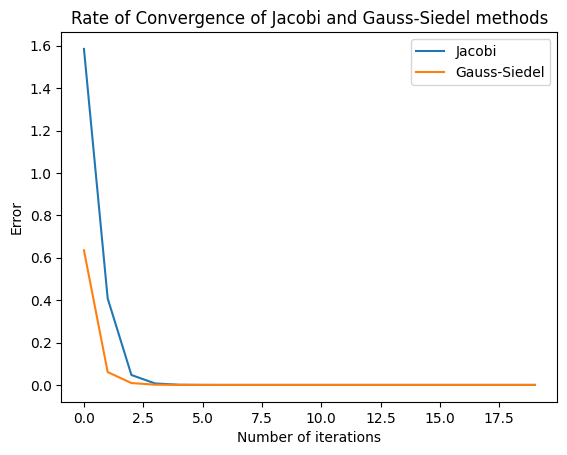

In [95]:
visualizeConvergence(10, 20)